## Ordinary Differential Equations

#### Oscar Reula, Pablo Montes

In [2]:
using Plots
using LaTeXStrings

### The Problem and Euler's Approximation

We aim to approximate solutions to the equation:

\begin{equation}
\frac{dy}{dt} = f(y)
\end{equation}

For now, we consider autonomous systems, where $f$ does not explicitly depend on $t$. As we will see, including an explicit $t$-dependence is straightforward but complicates the notation. We assume $f(y)$ is sufficiently continuously differentiable as needed.

Ordinary differential equation (ODE) theory states that given an initial value $y_0$ (so $y(0) = y_0$) within $f(\cdot)$'s domain, a solution $y(t)$ exists on a finite interval $[0,T]$. We seek to find a sequence of approximations, $\{\tilde{w}_i(t)\}$, such that:

$$
|| y - \tilde{w}_i|| \to 0 \;\;\; \text{as} \;\; i \to \infty
$$

In practice, rather than working with the continuous functions $\tilde{w}_i(t)$, we use a finite sequence of values $\{w^n\}$ at specific time points $\{t_n\} \in [0,T]$ (for $n=1,\dots, N$). The function $\tilde{w}(t)$ is an interpolation of these points, meaning $\tilde{w}(t_n) = w^n$.

For simplicity, we assume equally spaced time points:
$$
t_n = (n-1)\Delta t, \;\;\;\;\text{where}\;\;\;\; \Delta t = T/(N-1).
$$

The simplest approximation uses a first-order Taylor expansion. Knowing $y(t_n)$, we can approximate $y(t_{n+1})$:
$$
y(t_{n+1}) = y(t_n + \Delta t) \approx y(t_n) + \left.\frac{dy}{dt}\right|_{y(t)=y(t_n)} \Delta t + O(\Delta t^2)
$$
Since $\frac{dy}{dt} = f(y)$, this simplifies to:
$$
y(t_{n+1}) \approx y(t_n) + f(y(t_n)) \Delta t
$$

This leads to the numerical scheme:
$$
w^{n+1} = w^n + f(w^n) \Delta t.
$$
Given an initial condition $w^1 = y_0$, this formula generates a unique, finite sequence of points $\{w^n\}$ for $n = 1, \dots, N$. An interpolating function $\tilde{w}(t)$ can then be constructed from this sequence.

This is known as the *explicit Euler method*.

### Implementation of Euler's method

Let's consider a problem with a known solution, $\dfrac{dy}{dt} = \lambda y$, $y(0) = y_0$. This problem has solution $y(t) = y_0 e^{\lambda t}$. We now try to compare Euler's method with the exact solution:

In [23]:
#This function does one step of Euler's explicit method
function euler_step(y, Δt, f, pars)
    return y + Δt*f(y, pars)
end
#This is the right hand side of the ODE
function f(y, pars)
    λ = pars
    return λ*y
end

#This is the real solution
function exponential(t, λ, y_0)
    return y_0*exp(λ*t)
end


exponential (generic function with 1 method)

In [24]:
#= Some parameters=#
Δt = 0.15
N = 100
t = [Δt*(i-1) for i in 1:N]
y_0 = 1.0
#y_0 = 1.0 + im
λ = 1.0
#λ = 0.0 + im
pars = λ

sol = zeros(N)
#sol = zeros(N)*(0 + 0im)

sol[1] = y_0
y = y_0

#Evolution
for i in 2:N
    y = euler_step(y, Δt, f, pars)
    sol[i] = y
end

In [25]:
#plot(imag.(sol), real.(sol))
#plot!(imag.(exponential.(t, λ, y_0)), real.(exponential.(t, λ, y_0)), label = "Exact solution")

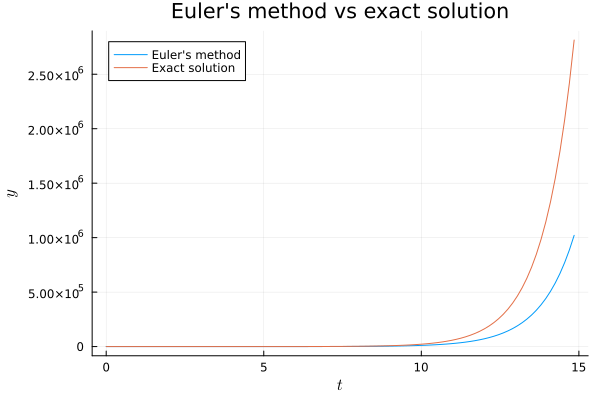

In [26]:
plot(title = "Euler's method vs exact solution", ylabel = L"y", xlabel = L"t")
plot!(t, real.(sol), label = "Euler's method")
plot!(t, real.(exponential.(t, λ, y_0)), label = "Exact solution")

### Step Error: 

The step error is defined as the error committed in each iteration step, assuming the error in the previous step is zero. This is obviously a false assumption, but we will later explain how to set it aside.

$$
\begin{array}{ll}
E^n &= y(t_n) - w^n = y(t_{n-1}) +   \frac{dy}{dt}|_{y = y(t_{n-1}) } \Delta t  + \frac{d^2y}{dt^2}|_{y=\zeta} \frac{\Delta t^2}{2} - w^{n-1} - f(w^{n-1}) \Delta t  \\
&= E^{n-1} + [f(y(t_{n-1})) - f(w^{n-1})] \Delta t + \frac{d^2y}{dt^2}|_{y=\zeta} \frac{\Delta t^2}{2}
\end{array}
$$

Where we have again used the mean value theorem for the second derivative. Assuming now that $E^{n-1}=0$, we obtain:

$$
|E^n| = |y(t_n) - w^n| \leq R \Delta t^2 
$$

where:

$$
R = \max_{t \in [0,T]} \| \frac{1}{2}\frac{d^2y}{dt^2}|_{t}\|
$$

Since we will commit an error of order $\Delta t^2$ in each time step and will take $N = \frac{T}{\Delta t}$ steps, the *global error* will be of order $\Delta t$. That is, the Euler method is first-order.

Let's analyze for example the error at $t=1$ for different values of $\Delta t$

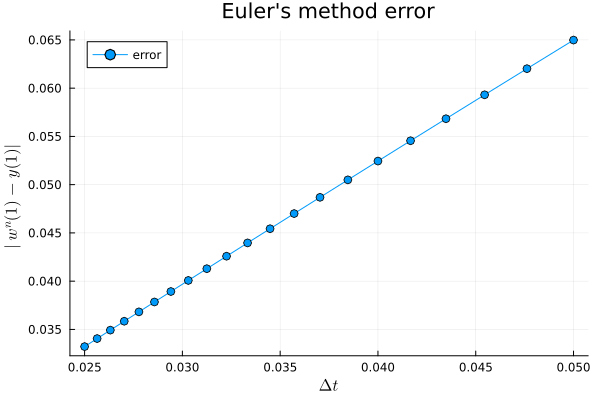

In [27]:
Nlist = 20:40
Δt_list = [1/N for N in Nlist]
ylist = []

y_0 = 1.0
λ = 1.0
pars = λ

for (Δt, N) in zip(Δt_list, Nlist)
    y = y_0
    for i in 1:N
        y = euler_step(y, Δt, f, pars)
    end
    push!(ylist, y)

end
        

plot(title = "Euler's method error", ylabel = L"|w^n(1)-y(1)|", xlabel = L"Δt")
plot!(Δt_list, abs.(ylist.-exponential(1, λ, y_0)), marker = :o, label = "error")

### 2. Multistep Methods:

Using Taylor expansion again,

$$
y(t_{n+1}) = y(t_n + \Delta t)  
= y(t_n) + \frac{dy}{dt}|_{t=t_{n}} \Delta t  + \frac{d^2y}{dt^2}|_{t=t_n} \frac{\Delta t^2}{2}  
+ \frac{d^3y}{dt^3}|_{t=t_n} \frac{\Delta t^3}{3!}  + \frac{d^4y}{dt^4}|_{t=\zeta} \frac{\Delta t^4}{4!} 
$$

By taking $\Delta t \to -\Delta t$ and subtracting, we see that,

$$
y(t_n + \Delta t) - y(t_n - \Delta t)
= 2\frac{dy}{dt}|_{t=t_{n}} \Delta t    
+ \frac{d^3y}{dt^3}|_{t=\zeta} \frac{\Delta t^3}{3!}  
$$

Therefore, the algorithm:

$$
w^{n+1} = w^{n-1} + 2\Delta t f(w^n)
$$

has a local error of third order!

This scheme has the advantage of being higher order while requiring only a single evaluation of $f$, making it computationally economical. However, we need to store two previous values, specifically $w^n$ and $w^{n-1}$. The major issue with these methods is that they can produce spurious solutions, making them less practical.

In [82]:
# Let's see an implementation of this!

function multistep_step(y_prev, y, Δt, f, pars)
    return y_prev + 2 * Δt * f(y, pars)
end


#= Some parameters =#
Δt = 0.01
N = 10000
t = [Δt * (i - 1) for i in 1:N]
#y_0 = 1.0
y_0 = 1.0 + im
#λ = -1.0
λ = 0.0 + im
pars = λ

#sol_ms = zeros(N)
sol_ms = zeros(N) * (0 + 0im)

# Initializing the first two steps for the multistep method
sol_ms[1] = y_0
sol_ms[2] = y_0 + Δt# euler_step(y_0, Δt, f, pars)  # Use the exact step or Euler as the second initial value
y_1 = sol_ms[1]
y_2 = sol_ms[2]

# Evolution
for i in 3:N
    y_next = multistep_step(y_1, y_2, Δt, f, pars)
    sol_ms[i] = y_next
    y_1 = y_2
    y_2 = y_next
end

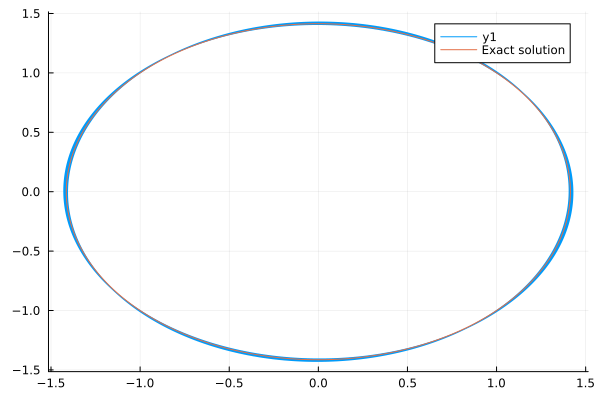

In [83]:
plot(imag.(sol_ms), real.(sol_ms))
plot!(imag.(exponential.(t, λ, y_0)), real.(exponential.(t, λ, y_0)), label = "Exact solution")

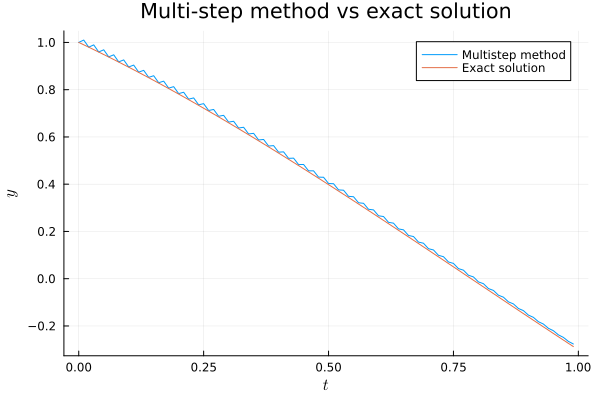

In [78]:
plot(title = "Multi-step method vs exact solution", ylabel = L"y", xlabel = L"t")
plot!(t, real.(sol_ms), label = "Multistep method")
plot!(t, real.(exponential.(t, λ, y_0)), label = "Exact solution")

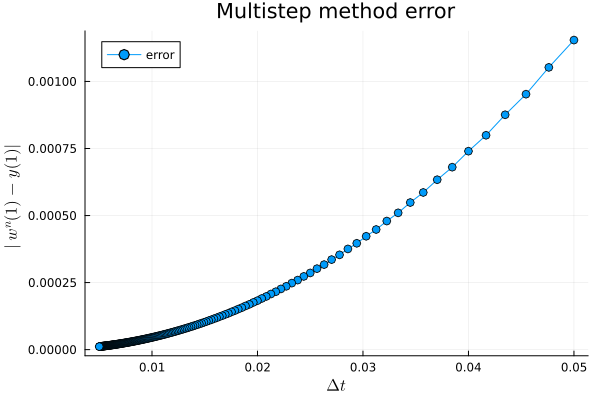

In [11]:
# Analysis parameters
Nlist = 20:200
Δt_list = [1/N for N in Nlist]
ylist_multistep = []

y_0 = 1.0
λ = 1.0
pars = λ

# Analyze the error for the multistep method
# Analyze the error for the multistep method
for (Δt, N) in zip(Δt_list, Nlist)
    # Initialize the first two steps correctly (using smaller steps)
    y_prev = exponential(-Δt, λ, y_0) # Start earlier
    y = y_0

    # Evolve the solution
    for i in 1:N
        y_next = multistep_step(y_prev, y, Δt, f, pars)
        y_prev = y
        y = y_next
    end

    push!(ylist_multistep, y)
end

# Plot the error for the multistep method
plot(title = "Multistep method error", ylabel = L"|w^n(1)-y(1)|", xlabel = L"Δt")
plot!(Δt_list, abs.(ylist_multistep .- exponential(1, λ, y_0)), marker = :o, label = "error")


### 3. Single-Step Methods

In the multistep methods discussed earlier, we obtained higher accuracy by using an intermediate point to calculate $ f $. However, this approach led to instabilities because the method produced multiple approximations. This caused some solutions to grow numerically unstable, even if the exact solution is supposed to be bounded or decreasing.

Instead of using two previous time points, we can take an initial step to an intermediate point. By multiplying by $\frac{\Delta t}{2}$, we obtain $ w^* = w^n + \frac{\Delta t}{2} f(w^n) $. At this midpoint, we can compute $ f(w^*) $ and use this value to advance a full step. This scheme is:

$$
\begin{array}{l}
k_1 &= \Delta t f(w^n)  \\
k_2 &= \Delta t f(w^n + \frac{1}{2}k_1)  \\
w^{n+1} &= w^{n} + k_2  
\end{array}
$$

This scheme is called the *Midpoint Method* or *Improved Euler*. It performs quite well for orbit calculations, as we will see in the following example:

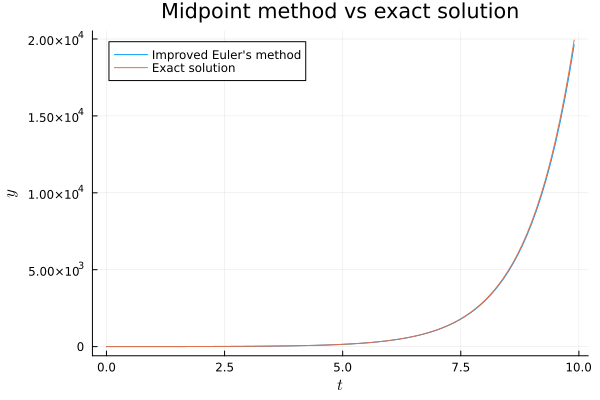

In [12]:
# Midpoint Method (Improved Euler) step function
function midpoint_step(y, Δt, f, pars)
    k1 = Δt * f(y, pars)
    k2 = Δt * f(y + 0.5 * k1, pars)
    return y + k2
end


#Parameters for the problem setup
Δt = 0.1
N = 100
t = [Δt * (i - 1) for i in 1:N]
#y_0 = 1.0 + im
y_0 = 1.0
λ = 1.0
#λ = im
pars = λ

sol_mp = zeros(N)
#sol_mp = zeros(N)*(1.0+im)
sol_mp[1] = y_0
y = y_0

# Use the Midpoint Method for evolution
for i in 2:N
    y = midpoint_step(y, Δt, f, pars)
    sol_mp[i] = y
end


plot(title = "Midpoint method vs exact solution", ylabel = L"y", xlabel = L"t")
plot!(t, real.(sol_mp), label = "Improved Euler's method")
plot!(t, real.(exponential.(t, λ, y_0)), label = "Exact solution")


In [13]:
#plot(imag.(sol_mp), real.(sol_mp))
#plot!(imag.(exponential.(t, λ, y_0)), real.(exponential.(t, λ, y_0)), label = "Exact solution")

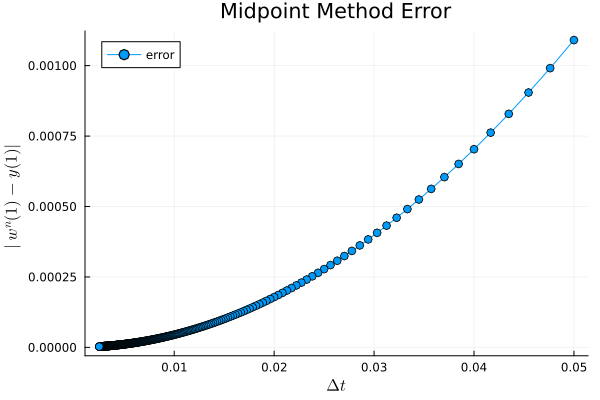

In [19]:
# Parameters for error analysis
Nlist = 20:400
Δt_list = [1/N for N in Nlist]
ylist_midpoint = []

y_0 = 1.0
λ = 1.0
pars = λ

# Analyze the error for the Midpoint Method
for (Δt, N) in zip(Δt_list, Nlist)
    y = y_0

    # Evolve the solution
    for i in 1:N
        y = midpoint_step(y, Δt, f, pars)
    end

    push!(ylist_midpoint, y)
end

# Plot the error for the Midpoint Method
plot(title = "Midpoint Method Error", ylabel = L"|w^n(1)-y(1)|", xlabel = L"Δt")
plot!(Δt_list, abs.(ylist_midpoint .- exponential(1, λ, y_0)), marker = :o, label = "error")

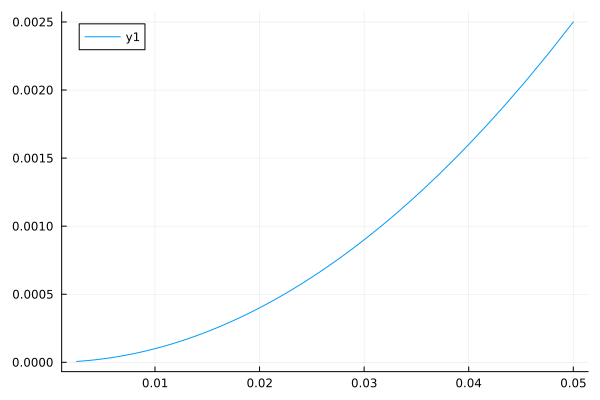

In [274]:
plot(Δt_list, t->t^2)

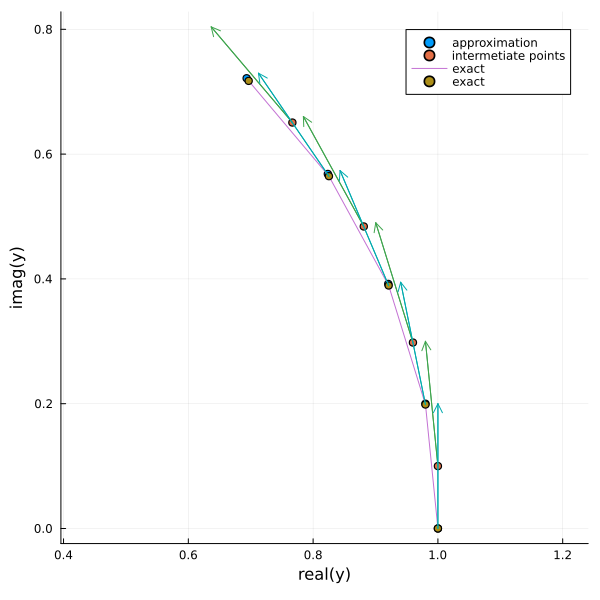

In [211]:
dt = 0.2
N = 5
x = zeros(N)
xint = zeros(N-1)
y = zeros(N)
yint = zeros(N-1)
vx = zeros(N)
vy = zeros(N)
x[1] = 1.0
y[1] = 0.0
for i in 2:N
    vx[i-1] = -dt*y[i-1]
    vy[i-1] = dt*x[i-1]
    xint[i-1] = x[i-1] + vx[i-1]/2
    yint[i-1] = y[i-1] + vy[i-1]/2
    vx[i-1] = -dt*yint[i-1]
    vy[i-1] = dt*xint[i-1]
    x[i] = x[i-1] + vx[i-1]
    y[i] = y[i-1] + vy[i-1]
end
vx[end] = 0.0 #-dt*y[end]
vy[end] = 0.0 #dt*x[end]

plt = scatter(x,y,size=(600,600),
    #xaxis=(0.6,1.01),
    label="approximation", ms=4)
scatter!(plt,xint,yint,label="intermetiate points", ms=4)
quiver!(plt,xint,yint,quiver=(vx,vy))

xe = [cos(dt*(i-1)) for i in 1:N]
ye = [sin(dt*(i-1)) for i in 1:N]
plot!(plt,xe,ye,label="exact",xlabel="real(y)", ylabel="imag(y)", aspectratio=1)
scatter!(plt,xe,ye,label="exact", ms=4)
quiver!(plt,xe[1:end-1],ye[1:end-1],quiver=(-dt*ye[1:end-1],dt*xe[1:end-1]))
current()
#png(plt, "vectorfieldMidPoint")

Alternatively, we could have advanced a full step $\Delta t$ to obtain a point $w^* = w^n + \Delta t f(w^n)$. At this approximate point, we could calculate $f(w^*)$, and then move forward again another full step from $w^n$ by using the average value of $f$. In this case, the resulting scheme is:

$$
\begin{array}{ll}
k_1 &= \Delta t f(w^n) %\nonumber 
\\
k_2 &= \Delta t f(w^n + k_1) %\nonumber 
\\
w^{n+1} &= w^{n} + \frac{1}{2}(k_1 + k_2) 
%\nonumber 
\end{array}
$$

which is called *Heum’s method*. Both methods have local errors of order $\Delta t^3$.

In fact, these are not the only methods with a third-order error; there is a whole family of them. We will describe them now and at the same time derive an expression to bound this error.
In order to find them, we will start with a generic method that has two evaluations of $f$.

$$
\begin{array}{ll}
k_1 &= \Delta t f(w^n) %\nonumber 
\\
k_2 &= \Delta t f(w^n + \alpha_{21} k_1) %\nonumber 
\\
w^{n+1} &= w^{n} + (A_1 k_1 + A_2 k_2) %\nonumber 
\end{array}
$$

The midpoint method corresponds to the choices $\alpha_{21} = \frac{1}{2}$, $(A_1 = 0, A_2 = 1)$, and Heum’s method to the following choices $\alpha = 1$, $(A_1 = \frac{1}{2}, A_2 = \frac{1}{2})$.

We apply Taylor expansions to the exact solution,

$$
\begin{array}{ll}
y(t_{n+1}) &= y(t_n) + f(y(t_{n})) \Delta t  + \frac{df}{dy}(y)f(y)|_{t=t_n} \frac{\Delta t^2}{2}  + [\frac{d^2f}{dy^2}(y) f^2(y) + (\frac{df}{dy})^2(y)f(y)]|_{t=\zeta} \frac{\Delta t^3}{3!}, %\nonumber 
\end{array}
$$

on the other hand, we have:

$$
\begin{array}{ll}
w^{n+1} &= w^n + (A_1 k_1 + A_2 k_2) %\nonumber 
\\
&= w^n + A_1 \Delta t f(w^n) + A_2 \Delta t f(w^n + \alpha_{21} k_1 ) %\nonumber 
\\
&= w^n + \Delta t (A_1 f(w^n) + A_2 [f(w^n) + \frac{df}{dy}(w^n)\alpha_{21}\Delta t f(w^n)] )+ O(\Delta t^3)  %\nonumber 
\\
&= w^n + \Delta t  (A_1 + A_2) f(w^n) + A_2\alpha_{21} \frac{df}{dy}(w^n) f(w^n)\Delta t^2 + O(\Delta t^3)  %\nonumber
\end{array}
$$

By comparing both expressions, we see that to have an $O(\Delta t^3)$ error, we need:

$$
A_1 + A_2 = 1 \;\;\;\;\; A_2 \alpha_{21} = \frac{1}{2}.
$$

This leads to a one-parameter family (two conditions for three unknowns) of third-order methods.

These types of algorithms are known as *Runge Kutta methods*. They are very efficient because you only need to evaluate the function at a few points, and they offer high accuracy.

Among them, one widely used method is the following 4th-order **RK4**:

$$
\begin{aligned}
    k_1 &= \Delta t \cdot f(w_n,t,p)\\
    k_2 &= \Delta t \cdot f(w_n + \frac{1}{2}k_1)\\
    k_3 &= \Delta t \cdot f(w_n + \frac{1}{2}k_2)\\
    k_4 &= \Delta t \cdot f(w_n + k_3)\\   
    w^n+1 &= w^n + (k_1 + 2k_2 + 2k_3 + k_4)/6
\end{aligned}
$$

Exercise: Implement the given Runge Kutta 4 method.

## Systems of Equations

Let's now try to solve a system of equations. Consider the harmonic oscillator, which appears many times in physics:

$$
\dfrac{d^2 x}{dt^2} = -k x,
$$ 

with initial conditions $x(0) = x_0$, $\dfrac{dx}{dt}|_{t=0} = v_0$. This equation has known solutions $x(t) = A\sin(\sqrt{k}x) + B\cos(\sqrt{k}x)$, with $B = x_0$ and $A = \frac{v_0}{\sqrt{k}}$.

At first glance this does not seem solvable by the previous methods, since we now have a second derivative in time. However, this can be easily solved by defining a new variable, $v(t) = \dfrac{dx}{dt}|_t$. Doing this we find the following system of equations:

$$
\begin{aligned}
\dfrac{dx}{dt} &= v\\
\dfrac{dv}{dt} &= -k x.
\end{aligned}
$$

This means that now, $y(t) = \begin{bmatrix} x(t)\\v(t)\end{bmatrix}$, and $f(y) = \begin{bmatrix} 0 & 1 \\ -k & 0\\ \end{bmatrix} \begin{bmatrix}x(t)\\v(t)\end{bmatrix}$

We will now solve this system using the `DifferentialEquations` package

In [ ]:
using DifferentialEquations


In [ ]:
method = RK4()

function oscillator!(du, u, p, t)
    k = p[1]
    du[1] = u[2]
    du[2] = -k*u[1]
end

function exact_solution(t, x_0, v_0, k)
    return x_0 * cos(sqrt(k) * t) + v_0 * sin(sqrt(k) * t)
end
x_0 = 1.0
v_0 = 0.0
# Initial conditions

u_0 = [x_0, v_0]
tspan = (0.0, 10.0)
k = 1.4
p = [k]


In [1]:
#To solve the system, we first define the ODE problem (that is, the RHS, the initial condition, the time span, and any parameters
#the right-hand side function needs). Then we call the solve function with the problem and method we want to use.)
#=
Examples of methods:
Euler- The canonical forward Euler method. Fixed timestep only.
Midpoint - The second order midpoint method. Uses embedded Euler method for adaptivity.
Heun - The second order Heun's method. Uses embedded Euler method for adaptivity.
Ralston - The optimized second order midpoint method. Uses embedded Euler method for adaptivity.
RK4 - The canonical Runge-Kutta Order 4 method. Uses a defect control for adaptive stepping using maximum error over the whole interval.
For the full list of methods, see the documentation: https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/
=#

#method = Euler()
method = RK4()
prob = ODEProblem(oscillator!, u_0, tspan, p)
sol = solve(prob, method, dt=0.1)
# Phase plot
plt1 = plot(sol, vars=(1, 2), label="RK4", xlabel=L"x(t)", ylabel=L"v(t)", aspect_ratio=1, adaptive=false)

# Displacement vs time
plt2 = plot(sol.t, sol[1, :], label="Displacement", xlabel="Time", ylabel=L"x(t)", legend=:bottomright)
plot!(plt2, sol.t, exact_solution.(sol.t, x_0, v_0, p), label="Exact solution", linestyle=:dash)

# Combine plots side-by-side
plot(plt1, plt2, layout = (1, 2), size=(900, 400))

UndefVarError: UndefVarError: `RK4` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

### Geometric interpretation

Let us plot the vector $\vec {f}(y)$, and also some solution with $y_0 = 1$, $\sqrt{k} = 1.4$
Grafiquemos el vector $\vec{f}(y)$ y una solución con $y_0=1$, $\omega = \sqrt{\frac{k}{m}} = 1.4$

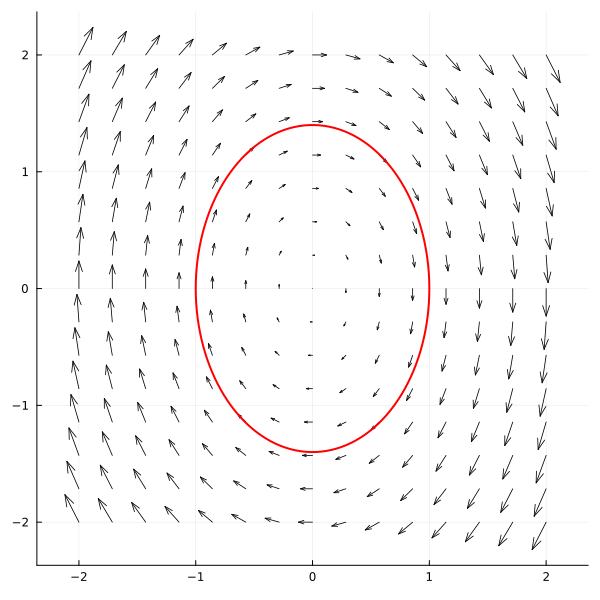

In [1]:
using Plots

ω = 1.4
scale = 0.2
u_(x, y) = scale * y
v_(x, y) = -ω^2 * scale * x

lims = (-2.2, 2.2)
x = y = range(-2.0, 2.0; length=15)

# Create meshgrid arrays X, Y using broadcasting
X = repeat(x', length(y))
Y = repeat(y, 1, length(x))

# Vector field scaled by c
c = 0.3
U = c .* u_.(X, Y)
V = c .* v_.(X, Y)

# Plotting setup
plot(size=(600,600), legend=false, aspect_ratio=1)

# Arrow drawing function with arrow heads
function arrow!(x, y, u, v; headsize=0.07, lw=1, color=:black, alpha=2)
    length = sqrt(u^2 + v^2)
    # Unit vectors for arrowhead calculation
    dir = [u, v] / length
    normal = [-v, u] / length

    # Calculate two arms of arrowhead
    v1 = (3*dir + normal) / sqrt(10)
    v2 = v1 - 2 * (v1' * normal) * normal

    # Scale arrowhead
    v1 *= headsize * length
    v2 *= headsize * length

    # Draw main arrow shaft
    plot!([x, x+u], [y, y+v], lw=lw, color=color, alpha=alpha)
    # Draw arrowhead arms
    plot!([x+u, x+u - v1[1]], [y+v, y+v - v1[2]], lw=lw, color=color, alpha=alpha)
    plot!([x+u, x+u - v2[1]], [y+v, y+v - v2[2]], lw=lw, color=color, alpha=alpha)
end

# Draw vector field arrows
for i in 1:length(x), j in 1:length(y)
    arrow!(X[i, j], Y[i, j], U[i, j], V[i, j]; headsize=0.4, lw=0.8, color=:black)
end

# Plot the phase trajectory y(t) = [cos(ωt), -ω sin(ωt)] over one period
plot!(t -> cos(ω*t), t -> -ω * sin(ω*t), 0, 2π, lw=2, label="y(t)", color = :red)

**We see that the solution has tangent vector $\vec{f}$!**

*The solutions are curves whose tangent vector at any point along them is $\vec{f}(y(t))$.*

If $\vec{f}$ is differentiable in a neighborhood of a point $p$, $U_p$, then for any $\vec{y}_0 \in U_p$ there will exist a finite interval $[0,T]$ and a curve $y(t):[0,T] \to U_p$ such that 

$$
\frac{d\vec{y}}{dt} = \vec{f}(\vec{y}(t)) \;\;\;\; \text{and} \;\; y(0) = y_0
$$

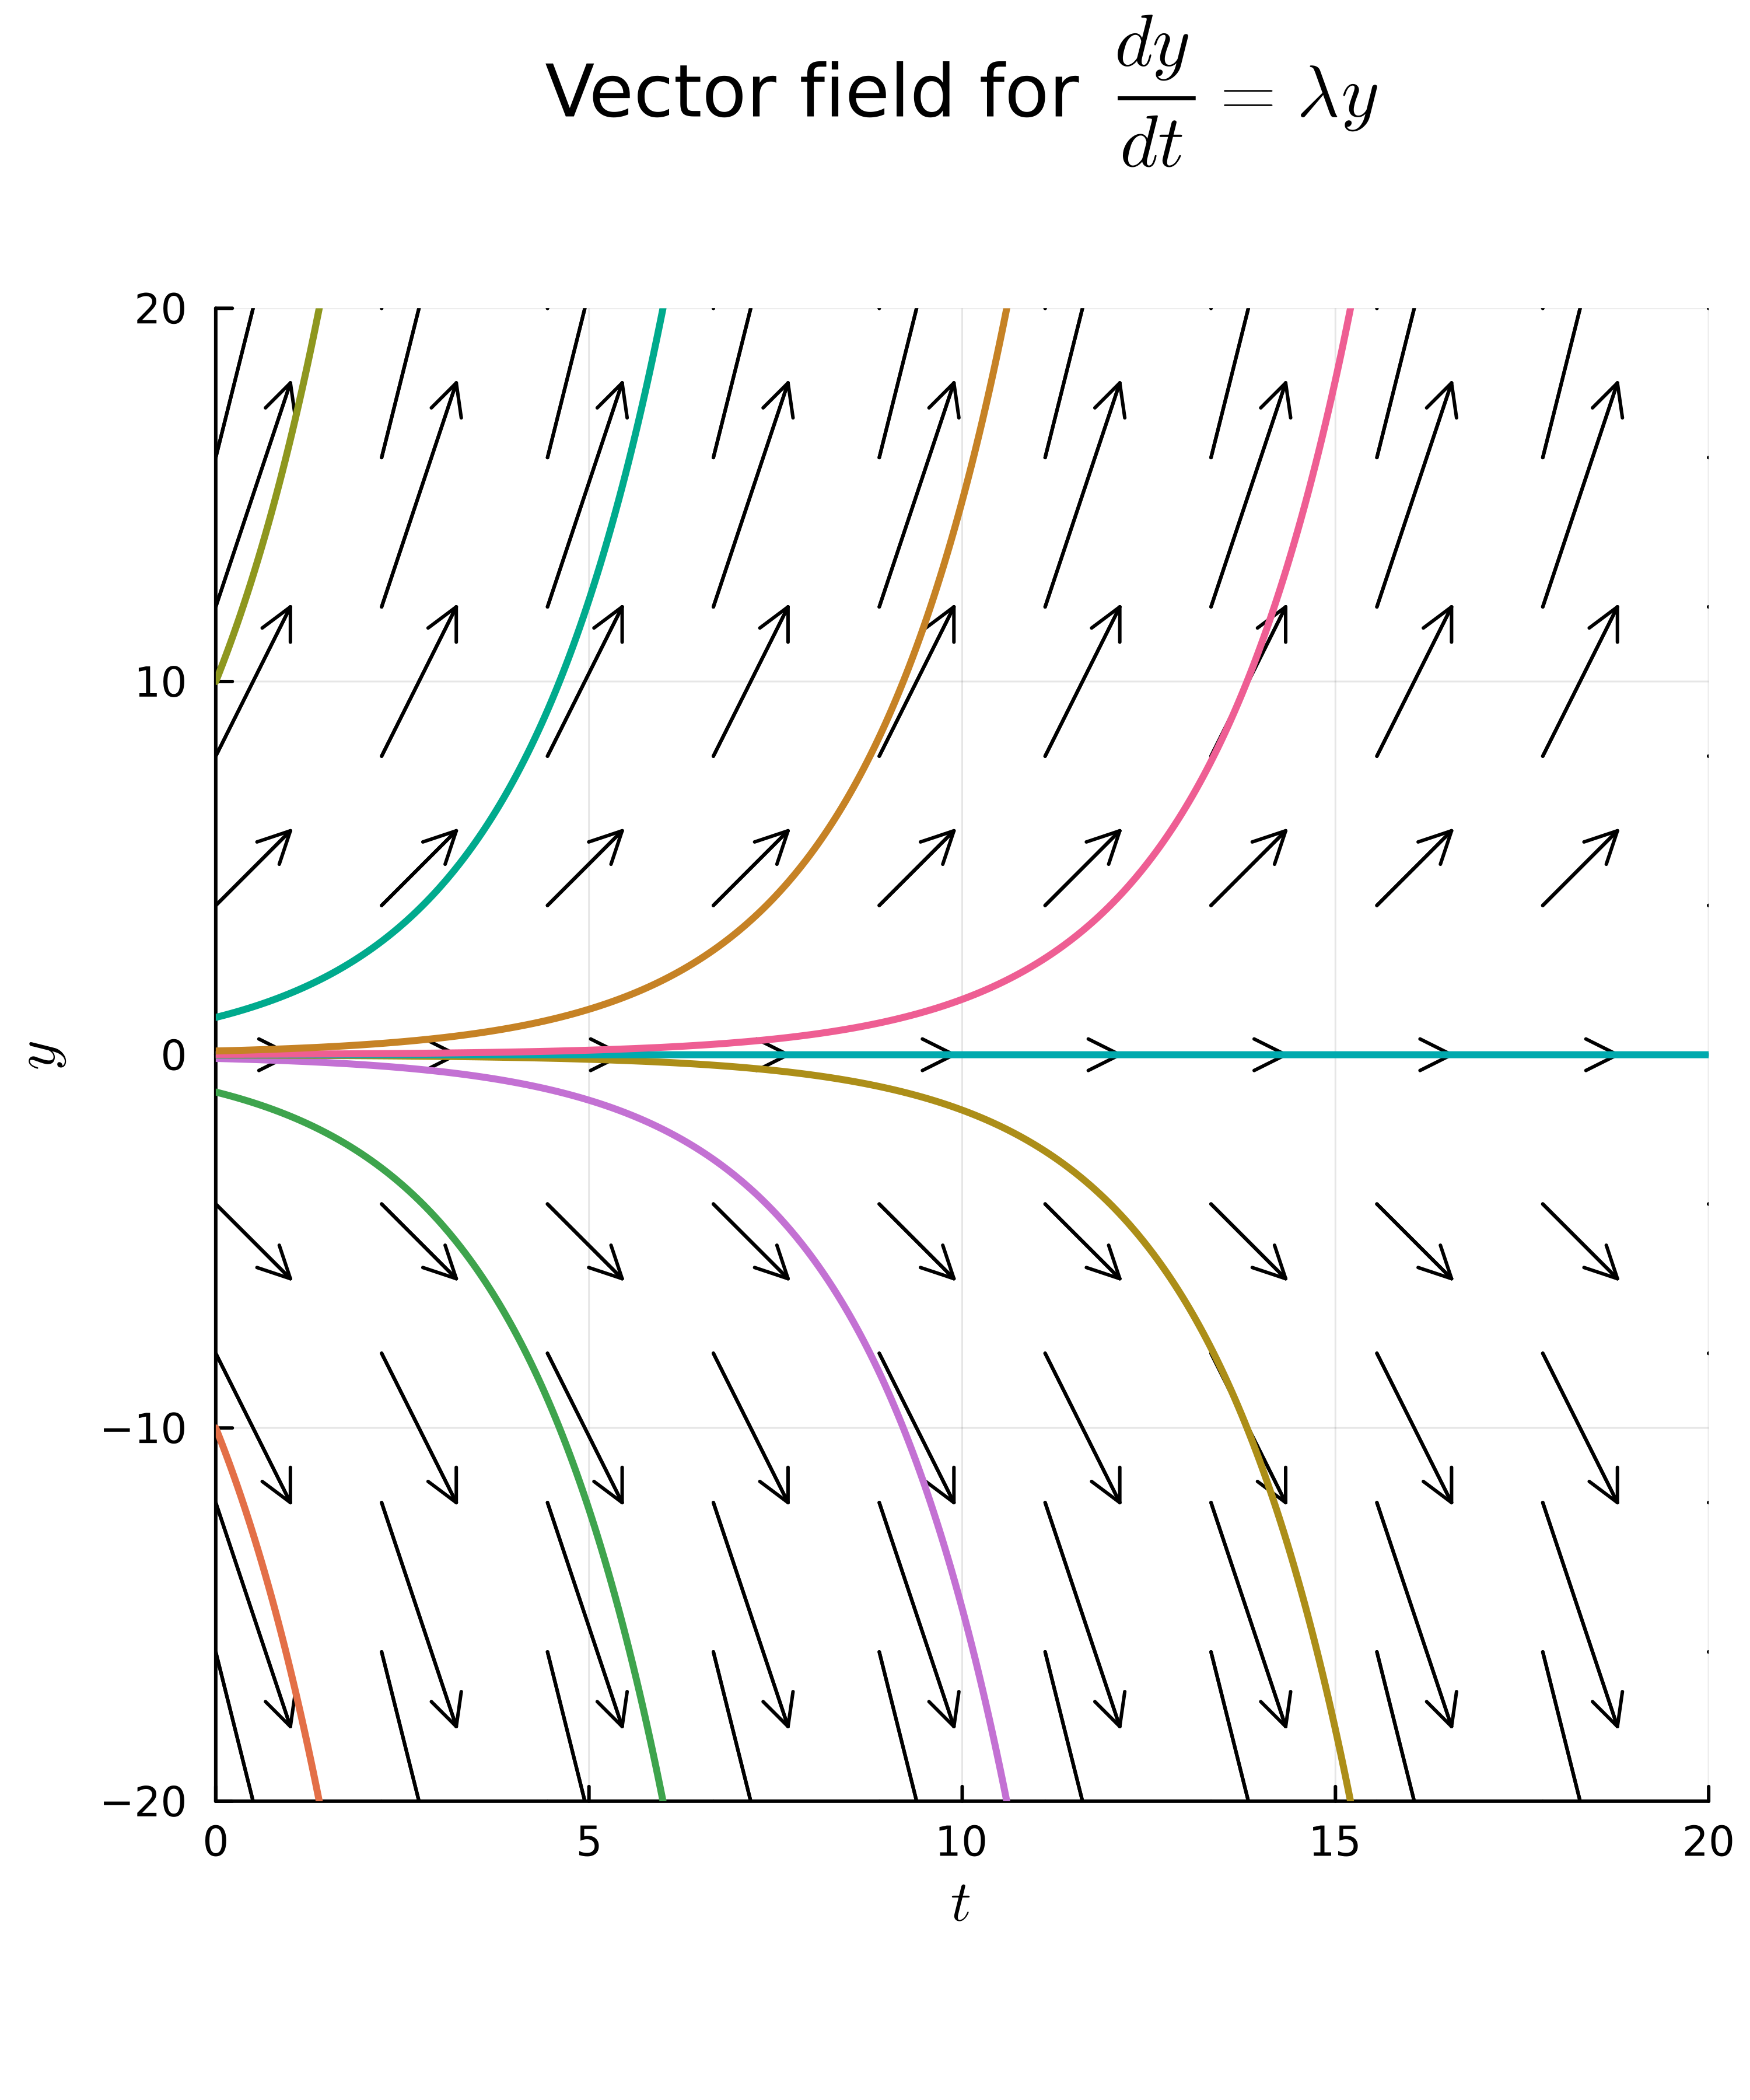

In [144]:
using Plots

λ = 0.5  # example value, change as needed
tlims = (0, 20)
ylims = (-20, 20)

# Create grid points
ts = range(tlims[1], tlims[2], length=10)
ys = range(ylims[1], ylims[2], length=11)

# Prepare arrays for vector field
T = repeat(ts', length(ys))
Y = repeat(ys, 1, length(ts))

# Vector components
U = ones(size(T))          # dt = 1 (horizontal vector component)
V = λ .* Y                 # dy/dt = f(y) = λ*y

# Plot quiver (arrows)
plot(xlim=tlims, ylim=ylims, size=(500,600), legend=false,
     xlabel=L"t", ylabel=L"y", aspect_ratio=0.5, title="Vector field for " * L"\frac{dy}{dt}=λy")

quiver!(vec(T), vec(Y), quiver=(vec(U), vec(V)), color=:black)
for y_0 in [-10,-1,-0.1,-0.01,0, 0.01, 0.1, 1, 10]
    t = tlims[1]:0.01:tlims[2]
    y = y_0 * exp.(λ * t)
    plot!(t, y, lw=2)
end
display(current())

## Non-autonomous systems

Now, consider a system where the vector field $\vec{f}$ depends on both $\vec{y}$ and the independent variable $t$:

$$
\frac{d\vec{y}}{dt}(t) = \vec{f}(\vec{y}, t)
$$

Here, the initial condition requires both position and initial time: $\vec{y}(t_0) = y_0$.

To apply autonomous system methods, we convert it by introducing:

$$
\begin{array}{ll}
\frac{d\vec{y}}{dt} &= \vec{f}(\vec{y}, \lambda) \\
\frac{d\lambda}{dt} &= 1
\end{array}
$$

This autonomous system is equivalent to the original if $\lambda(t_0) = t_0$.

#### Exercise:

If we use the strategy of expanding the system to include non-autonomous systems, we can deduce the formula for the non-autonomous methods. For example, for the Heun method we would have:

$$
\begin{aligned}
k_1 &= \Delta t \, f(w^n, \lambda^n)  \\
k_{1\lambda} &= \Delta t \cdot 1  \\
k_2 &= \Delta t \, f(w^n + k_1, \lambda^n + k_{1\lambda}) = \Delta t \, f(w^n + k_1, \lambda^n + \Delta t)  \\
k_{2\lambda} &= \Delta t \cdot 1 \\
w^{n+1} &= w^n + \frac{1}{2}(k_1 + k_2) \\
\lambda^{n+1} &= \lambda^n + \frac{1}{2}(k_{1\lambda} + k_{2\lambda}) = \lambda^n + \Delta t
\end{aligned}
$$

That is,

$$
\begin{aligned}
k_1 &= \Delta t \, f(w^n, t^n)  \\
k_2 &= \Delta t \, f(w^n + k_1, t^n + \Delta t)  \\
w^{n+1} &= w^n + \frac{1}{2}(k_1 + k_2) \\
t^{n+1} &= t^n + \Delta t
\end{aligned}
$$

Verify that for the RK4 method we obtain: ($h = \Delta t$)
```julia
function RK4(f,w0,t0,h,p)
    k1 = h*f(w0,t0,p)
    k2 = h*f(w0 + k1/2,t0 + h/2,p)
    k3 = h*f(w0 + k2/2,t0 + h/2,p)
    k4 = h*f(w0 + k3,t0 + h,p)   
    return w0 + (k1 + 2k2 + 2k3 + k4)/6
end
```